1) To multiply an (n,k) matrix by a (k,m) matrix

Total Multiplications: n⋅m⋅k

Total Additions: n⋅m⋅(k−1)

The final matrix has n×m total elements.

Calculating each of these elements requires a dot product.

This single dot product takes k multiplications and k−1 additions.

This process is repeated for all n×m elements in the resulting matrix to find the total number of operations.

In [36]:
#2
import time, random, numpy as np

def matmul_lists(a, b):
    return [[sum(a[i][k] * b[k][j] for k in range(len(a[0])))
             for j in range(len(b[0]))] for i in range(len(a))]

rows_a, shared_dim, cols_b = 250, 500, 300
print(f"Multiplying ({rows_a} x {shared_dim}) with ({shared_dim} x {cols_b})\n")

A = [[random.random() for _ in range(shared_dim)] for _ in range(rows_a)]
B = [[random.random() for _ in range(cols_b)] for _ in range(shared_dim)]


t1 = time.time()
matmul_lists(A, B)
t2 = time.time()
list_time = t2 - t1
print(f"List-based: {list_time:.6f} seconds\n{'-'*50}")


A_np, B_np = np.array(A), np.array(B)
t3 = time.time()
A_np @ B_np
t4 = time.time()
np_time = t4 - t3
print(f"NumPy: {np_time:.6f} seconds\n{'-'*50}")


if np_time < list_time:
    print(f"NumPy is faster by ~{list_time/np_time:.2f}x.")
else:
    print("Lists were faster (unlikely).")

print("\nWhy NumPy is faster:\n1. Optimized C backend\n2. Contiguous memory storage\n3. Vectorized CPU instructions (SIMD)")


Multiplying (250 x 500) with (500 x 300)

List-based: 5.490535 seconds
--------------------------------------------------
NumPy: 0.003114 seconds
--------------------------------------------------
NumPy is faster by ~1762.92x.

Why NumPy is faster:
1. Optimized C backend
2. Contiguous memory storage
3. Vectorized CPU instructions (SIMD)


In [38]:
#3
import time
import random, time, numpy as np

def median_passes(data):
    arr = data[:]
    for _ in range(len(arr)//2):
        arr.remove(min(arr))
    return float(min(arr)) if len(data) % 2 else (lambda x, y: (x+y)/2)(*sorted(arr[:2]))

def median_sort(data):
    arr = sorted(data)
    mid = len(arr)//2
    return float(arr[mid]) if len(arr) % 2 else (arr[mid-1] + arr[mid]) / 2

size = 5000
nums = [random.random() for _ in range(size)]
print(f"Finding the median of {size:,} elements.\n")


t1 = time.time()
m1 = median_passes(nums)
t1 = time.time() - t1
print(f"--- Passes Method ---\nMedian: {m1}\nTime: {t1:.6f}s\n{'-'*45}")


t2s = time.time()
m2 = median_sort(nums)
t2 = time.time() - t2s
print(f"--- Sorting Method ---\nMedian: {m2}\nTime: {t2:.6f}s\n{'-'*45}")


arr_np = np.array(nums)
t3s = time.time()
m3 = np.median(arr_np)
t3 = time.time() - t3s
print(f"--- NumPy Method ---\nMedian: {m3}\nTime: {t3:.6f}s\n{'-'*45}")


print(f"Sorting ~{t1/t2:.2f}x faster than passes")
print(f"NumPy ~{t2/t3:.2f}x faster than sorting")
print(f"NumPy ~{t1/t3:.2f}x faster than passes")


Finding the median of 5,000 elements.

--- Passes Method ---
Median: 0.6476955576305643
Time: 0.193614s
---------------------------------------------
--- Sorting Method ---
Median: 0.4957015964173023
Time: 0.000860s
---------------------------------------------
--- NumPy Method ---
Median: 0.4957015964173023
Time: 0.000317s
---------------------------------------------
Sorting ~225.01x faster than passes
NumPy ~2.72x faster than sorting
NumPy ~611.04x faster than passes


4)The function given is:
f(x,y)=x²y + y³

To find the gradient, we need to calculate the partial derivatives of the function with respect to both x and y.

The derivarive of x²y is 2xy
The derivative of y³
sin(x) is y³ cos(x)

So the partial derivative with respect to x is
fracpartial f partialx =2xy+y³cos(x)

The derivative of x²y is x².
The derivative of y³ sin(x) is 3y² sin(x)

so the partial derivative with respect to y is
fracpartial f partially = x² + 3y² sin(x)

The gradient
nabla f , is a vector containing both partial derivatives.

nabla f(x,y)= left[fracpartial f partialx,fracpartial f partially right] = [2xy + y³cos(x),quadx²+3y² sin (x)]

In [2]:
#5
!pip install jax jaxlib -q
import jax
import jax.numpy as jnp
import random as rnd


def func(a, b):
    return a**2 * b + b**3 * jnp.sin(a)


def grad_manual(a, b):
    return jnp.array([
        2*a*b + b**3 * jnp.cos(a),
        a**2 + 3*b**2 * jnp.sin(a)
    ])


grad_jax = jax.grad(func, argnums=(0, 1))

print("--- Gradient Check ---")
for _ in range(3):
    p, q = rnd.uniform(1, 10), rnd.uniform(1, 10)
    g_jax = jnp.array(grad_jax(p, q))
    g_manual = grad_manual(p, q)
    print(f"\nAt (a, b) = ({p:.2f}, {q:.2f}):")
    print(f"  JAX:   {g_jax}")
    print(f"  Manual:{g_manual}")
    print("  Match?", jnp.allclose(g_jax, g_manual))

print("\nVerified: Analytical gradient matches JAX.")


--- Gradient Check ---

At (a, b) = (9.58, 4.11):
  JAX:   [10.294144 83.84804 ]
  Manual:[10.294136 83.848045]
  Match? True

At (a, b) = (4.42, 2.81):
  JAX:   [18.568434  -3.1426468]
  Manual:[18.568436 -3.142643]
  Match? True

At (a, b) = (2.00, 3.34):
  JAX:   [-2.1470165 34.482723 ]
  Manual:[-2.1470165 34.482723 ]
  Match? True

Verified: Analytical gradient matches JAX.


In [41]:
#6
import sympy as sp

u, v = sp.symbols('u v')

g = u**2 * v + v**3 * sp.sin(u)

grad_g = sp.Matrix([sp.diff(g, u), sp.diff(g, v)])

print("Function:")
sp.pprint(g, use_unicode=True)
print("\nGradient:")
sp.pprint(grad_g, use_unicode=True)


Function:
 2      3       
u ⋅v + v ⋅sin(u)

Gradient:
⎡         3       ⎤
⎢2⋅u⋅v + v ⋅cos(u)⎥
⎢                 ⎥
⎢ 2      2        ⎥
⎣u  + 3⋅v ⋅sin(u) ⎦


In [42]:
#7
data = {
    2022: {
        "CSE": [
            {
                "ID": 1,
                "Name": "Alex",
                "Scores": {"Math": 100, "Eng": 70}
            }
        ],
        "ECE": []
    },
    2023: {"CSE": [], "ECE": []},
    2024: {"CSE": [], "ECE": []},
    2025: {"CSE": [], "ECE": []}
}

print(data)


{2022: {'CSE': [{'ID': 1, 'Name': 'Alex', 'Scores': {'Math': 100, 'Eng': 70}}], 'ECE': []}, 2023: {'CSE': [], 'ECE': []}, 2024: {'CSE': [], 'ECE': []}, 2025: {'CSE': [], 'ECE': []}}


In [43]:
#8
class Student:
    def __init__(self, sid, name, scores):
        self.sid = sid
        self.name = name
        self.scores = scores

class Branch:
    def __init__(self, bname):
        self.bname = bname
        self.students = []

    def add(self, student):
        self.students.append(student)

class Year:
    def __init__(self, yr):
        self.yr = yr
        self.branches = []

    def add(self, branch):
        self.branches.append(branch)

class DB:
    def __init__(self):
        self.years = []

    def add(self, year):
        self.years.append(year)


db = DB()


y2022 = Year(2022)
cse = Branch("CSE")
stu1 = Student(1, "Alex", {"Math": 100, "Eng": 70})

cse.add(stu1)
y2022.add(cse)
y2022.add(Branch("ECE"))

db.add(y2022)

for y in db.years:
    print(f"Year: {y.yr}")
    for b in y.branches:
        print(f"  {b.bname}")
        for s in b.students:
            print(f"    ID: {s.sid}, Name: {s.name}, Scores: {s.scores}")



Year: 2022
  CSE
    ID: 1, Name: Alex, Scores: {'Math': 100, 'Eng': 70}
  ECE


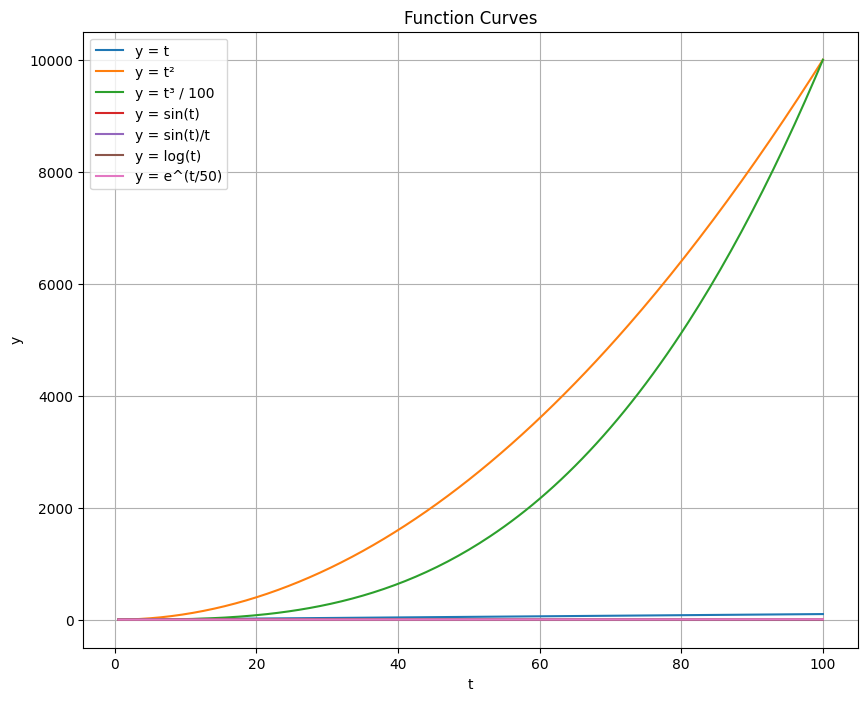

In [44]:
#9
import numpy as np
import matplotlib.pyplot as plt

t = np.arange(0.5, 100.5, 0.5)

fns = [
    (t, "y = t"),
    (t**2, "y = t²"),
    (t**3 / 100, "y = t³ / 100"),
    (np.sin(t), "y = sin(t)"),
    (np.sin(t) / t, "y = sin(t)/t"),
    (np.log(t), "y = log(t)"),
    (np.exp(t / 50), "y = e^(t/50)")
]

plt.figure(figsize=(10, 8))
for y, lbl in fns:
    plt.plot(t, y, label=lbl)

plt.xlabel("t")
plt.ylabel("y")
plt.title("Function Curves")
plt.legend()
plt.grid(True)
plt.show()


In [45]:
#10
import numpy as np
import pandas as pd

data = np.random.randint(1, 3, (20, 5))
df = pd.DataFrame(data, columns=list("abcde"))

max_std_col = df.std().idxmax()
min_mean_row = df.mean(1).idxmin()

print(df)
print("\nMax std col:", max_std_col)
print("Min mean row:", min_mean_row)


    a  b  c  d  e
0   2  2  2  2  1
1   1  2  2  2  1
2   2  2  1  1  1
3   1  2  1  1  1
4   1  1  1  1  1
5   2  2  2  1  1
6   1  2  2  1  1
7   1  2  1  1  2
8   2  1  1  2  2
9   1  1  2  2  1
10  2  2  2  1  2
11  1  2  1  2  1
12  2  1  2  1  2
13  2  2  1  1  2
14  1  1  2  1  1
15  1  2  1  1  1
16  1  2  2  1  1
17  2  2  1  1  1
18  1  2  1  2  1
19  1  2  2  1  1

Max std col: c
Min mean row: 4


In [48]:
#11
import numpy as np
import pandas as pd

scores = np.random.randint(1, 10, (20, 5))
df = pd.DataFrame(scores, columns=[f"sub{i}" for i in range(1, 6)])

df["total"] = df.sum(axis=1)
df["status"] = np.where(df["total"] < 8, "LT8", "GT8")

lt8_cnt = (df["status"] == "LT8").sum()

grouped_std = df.groupby("status")["total"].std()
lt8_std = grouped_std.get("LT8", np.nan)
gt8_std = grouped_std.get("GT8", np.nan)


print(df)
print("\nLT8 count:", lt8_cnt)
print("LT8 std:", lt8_std)
print("GT8 std:", gt8_std)

    sub1  sub2  sub3  sub4  sub5  total status
0      8     2     4     2     1     17    GT8
1      6     5     5     6     6     28    GT8
2      2     6     1     7     9     25    GT8
3      8     6     9     4     9     36    GT8
4      3     6     1     5     4     19    GT8
5      3     8     5     3     2     21    GT8
6      7     3     1     4     7     22    GT8
7      9     3     3     7     8     30    GT8
8      4     4     4     2     4     18    GT8
9      5     9     6     4     9     33    GT8
10     4     5     9     2     3     23    GT8
11     7     6     5     8     2     28    GT8
12     3     7     1     6     2     19    GT8
13     6     2     8     8     5     29    GT8
14     3     2     4     8     5     22    GT8
15     7     6     4     7     8     32    GT8
16     4     5     1     7     6     23    GT8
17     1     3     7     5     5     21    GT8
18     9     5     1     9     6     30    GT8
19     2     6     2     1     8     19    GT8

LT8 count: 0

In [34]:
#12
import numpy as np

matrix_2d = np.array([[2, 4, 6],
                      [1, 3, 5],
                      [7, 8, 9]])


vector_1d = np.array([5, 10, 15])

sum_result = matrix_2d + vector_1d

print("Matrix:\n", matrix_2d)
print("\nVector:\n", vector_1d)
print("\nAfter Broadcasting Addition:\n", sum_result)


Matrix:
 [[2 4 6]
 [1 3 5]
 [7 8 9]]

Vector:
 [ 5 10 15]

After Broadcasting Addition:
 [[ 7 14 21]
 [ 6 13 20]
 [12 18 24]]


In [1]:
#13
import numpy as np

def get_min_index(num_array):
    """Return the index of the smallest value in the array."""
    return np.argmin(num_array)

numbers = np.array([14, 7, 3, 9, 12])
min_idx = get_min_index(numbers)

print("Array:", numbers)
print("Index of smallest element:", min_idx)
print("Smallest value:", numbers[min_idx])


Array: [14  7  3  9 12]
Index of smallest element: 2
Smallest value: 3
